# Task-6 :- Data science & Business Analytics

By Arcot Harish Intern at The Sparks Foundation

Task(Advanced):- To create a decision tree of Iris dataset and visualizing it graphically, and to check whether if we feed any a new data, it would predict the right class accordingly or not.

# Import relevant libraries

In [5]:
#Here we import all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reading data

In [6]:
# Reading csv data and displaying first five elements
data = pd.read_csv('Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
#Let us chexck whether there are any null values
data.isnull().any()

Id               False
SepalLengthCm    False
SepalWidthCm     False
PetalLengthCm    False
PetalWidthCm     False
Species          False
dtype: bool

Thus, there are no null values in our dataset.

In [8]:
#checking unique values in species
data['Species'].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64

In [9]:
#seperating dependent and independent variables
x=data.iloc[:,1:5].values #As id column is unnecessary
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [11]:
y=data.iloc[:,-1].values
y

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versic

In [15]:
#As Machine Learning algorithms accepts only numerical values we have to convert "Species" column into numericals. 
#For this we can encode it using LabelEncoder
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()

In [17]:
lb=LabelEncoder()
y=lb.fit_transform(y)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

# Shuffling the dataset 

In [18]:
data=data.sample(frac=1)

In [19]:
data['y']=lb.fit_transform(data['Species'])

In [21]:
data.head(20)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,y
145,146,6.7,3.0,5.2,2.3,Iris-virginica,2
121,122,5.6,2.8,4.9,2.0,Iris-virginica,2
111,112,6.4,2.7,5.3,1.9,Iris-virginica,2
122,123,7.7,2.8,6.7,2.0,Iris-virginica,2
47,48,4.6,3.2,1.4,0.2,Iris-setosa,0
137,138,6.4,3.1,5.5,1.8,Iris-virginica,2
115,116,6.4,3.2,5.3,2.3,Iris-virginica,2
104,105,6.5,3.0,5.8,2.2,Iris-virginica,2
136,137,6.3,3.4,5.6,2.4,Iris-virginica,2
138,139,6.0,3.0,4.8,1.8,Iris-virginica,2


Thus From above, comparing the last columns following are the labels after encoding:
Iris-setosa - 0
Iris-versicolor - 1
Iris-virginica - 2

# Splitting the dataset for testing and training

In [24]:
from sklearn.model_selection import train_test_split
#Taking 80% data for training and 20% data for testing
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100)

# Building a Decision Tree Classifier, Training and predictions

In [25]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train,y_train) # fitting training set variables of x&y in decision tree classfier method

DecisionTreeClassifier()

In [26]:
#Let's predict the model with test set
y_pred = model.predict(x_test)
y_pred

array([2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 0, 2, 0, 0, 2, 1, 1, 2, 2, 2, 2, 0,
       2, 0, 1, 2, 1, 0, 1, 2])

In [27]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.83      0.91         6
           2       0.93      1.00      0.96        13

    accuracy                           0.97        30
   macro avg       0.98      0.94      0.96        30
weighted avg       0.97      0.97      0.97        30



In [28]:
print(confusion_matrix(y_test,y_pred))

[[11  0  0]
 [ 0  5  1]
 [ 0  0 13]]


# Testing our model with random test case 

In [29]:
p = model.predict([[7.3,2.9,6.3,1.8]]) ## Predicted label should be Iris-virginica 
p

array([2])

Label - 2 belongs to Iris-virigica,hence our prediction is right

# Visualizing Decision Tree

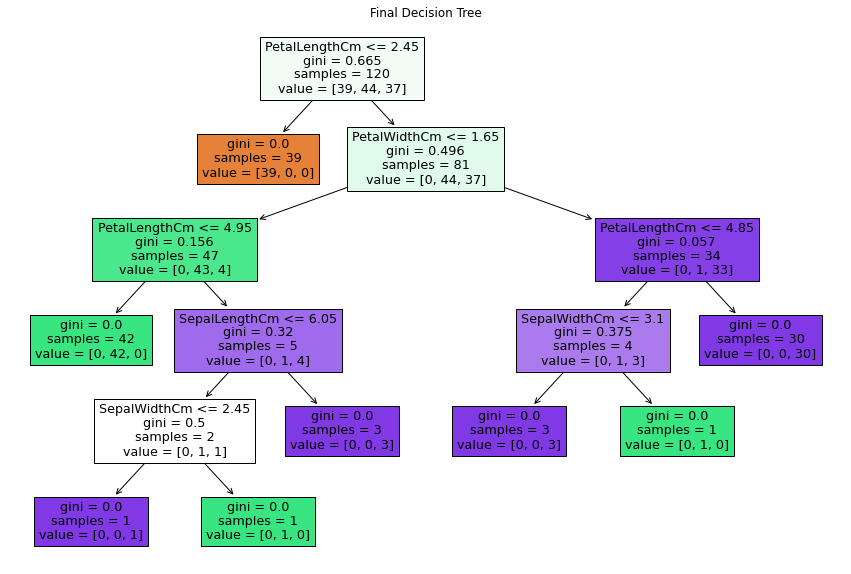

In [30]:
from sklearn import tree
plt.figure(figsize = (15,10))
tree.plot_tree(model,
               feature_names = data.iloc[:, 1:5].columns.values,
               filled = True);
plt.title("Final Decision Tree")
plt.show()

# Thank you very much 